In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# Load HR dataset
data = pd.read_csv(r"C:\Users\cp756\OneDrive\Desktop\HR Analytics Mini Project zip\HR Analytics Mini Project\HR_Analytics.csv")
data

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25       Yes      Travel_Rarely        230   
1      RM302   18    18-25        No      Travel_Rarely        812   
2      RM458   18    18-25       Yes  Travel_Frequently       1306   
3      RM728   18    18-25        No         Non-Travel        287   
4      RM829   18    18-25       Yes         Non-Travel        247   
...      ...  ...      ...       ...                ...        ...   
1475   RM412   60      55+        No      Travel_Rarely        422   
1476   RM428   60      55+        No  Travel_Frequently       1499   
1477   RM537   60      55+        No      Travel_Rarely       1179   
1478   RM880   60      55+        No      Travel_Rarely        696   
1479  RM1210   60      55+        No      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  ...  \
0     Research & Development                 3          3  Life Sciences  ...   
1                      Sales                10          3        Medical  ...   
2                      Sales                 5          3      Marketing  ...   
3     Research & Development                 5          2  Life Sciences  ...   
4     Research & Development                 8          1        Medical  ...   
...                      ...               ...        ...            ...  ...   
1475  Research & Development                 7          3  Life Sciences  ...   
1476                   Sales                28          3      Marketing  ...   
1477                   Sales                16          4      Marketing  ...   
1478                   Sales                 7          4      Marketing  ...   
1479  Research & Development                 1          4        Medical  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            3             80                 0   
1                            1             80                 0   
2                            4             80                 0   
3                            4             80                 0   
4                            4             80                 0   
...                        ...            ...               ...   
1475                         4             80                 0   
1476                         4             80                 0   
1477                         4             80                 0   
1478                         2             80                 1   
1479                         3             80                 1   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    0                      2                3   
1                    0                      2                3   
2                    0                      3                3   
3                    0                      2                3   
4                    0                      0                3   
...                ...                    ...              ...   
1475                33                      5                1   
1476                22                      5                4   
1477                10                      1                3   
1478                12                      3                3   
1479                19                      2                4   

      YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0                  0                  0                        0   
1                  0                  0                        0   
2                  0                  0                        0   
3                  0                  0                        0   
4                  0                  0                        0   
...              ...                ...                      ...   
1475              29                  8                       11   
1476              18                 13            

In [8]:
data.head

<bound method NDFrame.head of        EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25       Yes      Travel_Rarely        230   
1      RM302   18    18-25        No      Travel_Rarely        812   
2      RM458   18    18-25       Yes  Travel_Frequently       1306   
3      RM728   18    18-25        No         Non-Travel        287   
4      RM829   18    18-25       Yes         Non-Travel        247   
...      ...  ...      ...       ...                ...        ...   
1475   RM412   60      55+        No      Travel_Rarely        422   
1476   RM428   60      55+        No  Travel_Frequently       1499   
1477   RM537   60      55+        No      Travel_Rarely       1179   
1478   RM880   60      55+        No      Travel_Rarely        696   
1479  RM1210   60      55+        No      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  ...  \
0     Research & Development                 3  

In [9]:
data.info

<bound method DataFrame.info of        EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25       Yes      Travel_Rarely        230   
1      RM302   18    18-25        No      Travel_Rarely        812   
2      RM458   18    18-25       Yes  Travel_Frequently       1306   
3      RM728   18    18-25        No         Non-Travel        287   
4      RM829   18    18-25       Yes         Non-Travel        247   
...      ...  ...      ...       ...                ...        ...   
1475   RM412   60      55+        No      Travel_Rarely        422   
1476   RM428   60      55+        No  Travel_Frequently       1499   
1477   RM537   60      55+        No      Travel_Rarely       1179   
1478   RM880   60      55+        No      Travel_Rarely        696   
1479  RM1210   60      55+        No      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  ...  \
0     Research & Development                 3

In [10]:
data.duplicated().sum()

7

In [11]:
data.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [12]:
data.fillna(10, inplace = True)

In [13]:
data.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [14]:
data_new = data.drop_duplicates()

In [15]:
data_new.duplicated().sum()

0

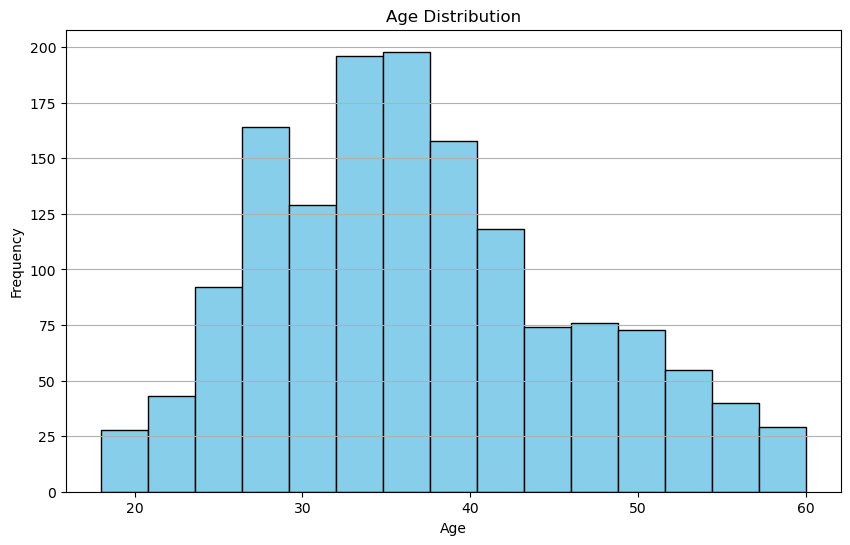

In [16]:
# 1. Age Distribution Histogram
plt.figure(figsize=(10, 6))
plt.hist(data_new['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


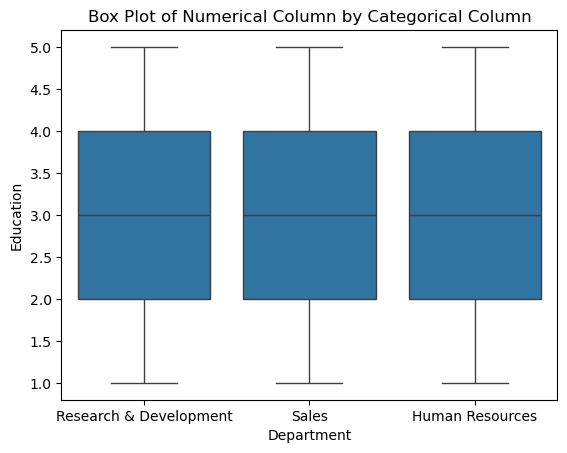

In [49]:
# Box plot
sns.boxplot(x='Department', y='Education', data=data)
plt.title('Box Plot of Numerical Column by Categorical Column')
plt.show()

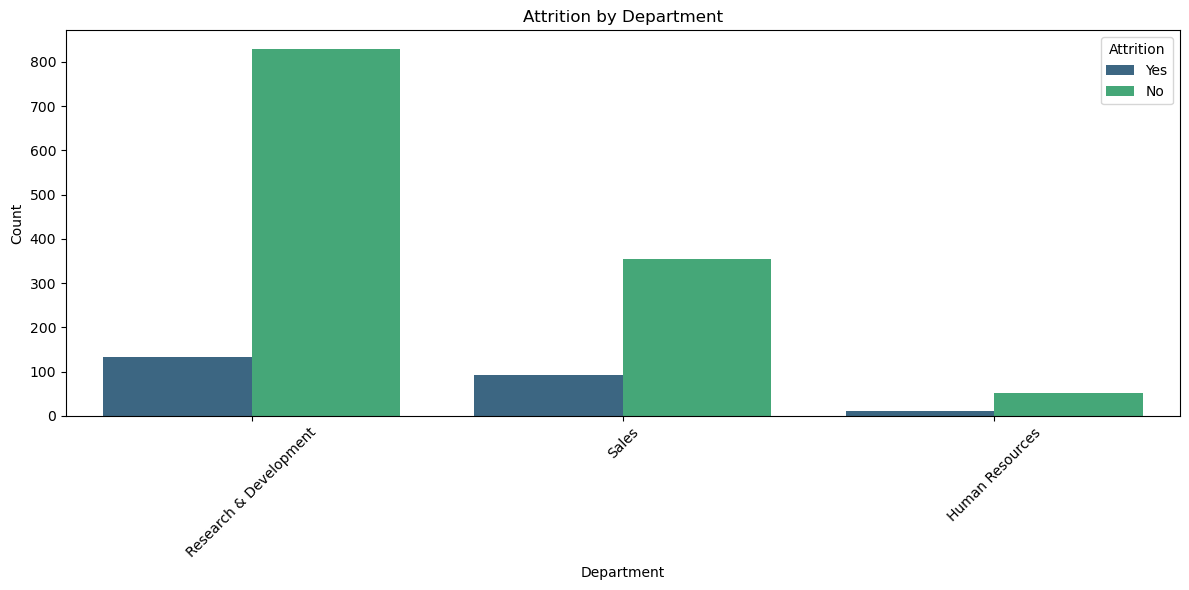

In [18]:
# 2. Attrition by Department
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Attrition', data=data_new, palette='viridis')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

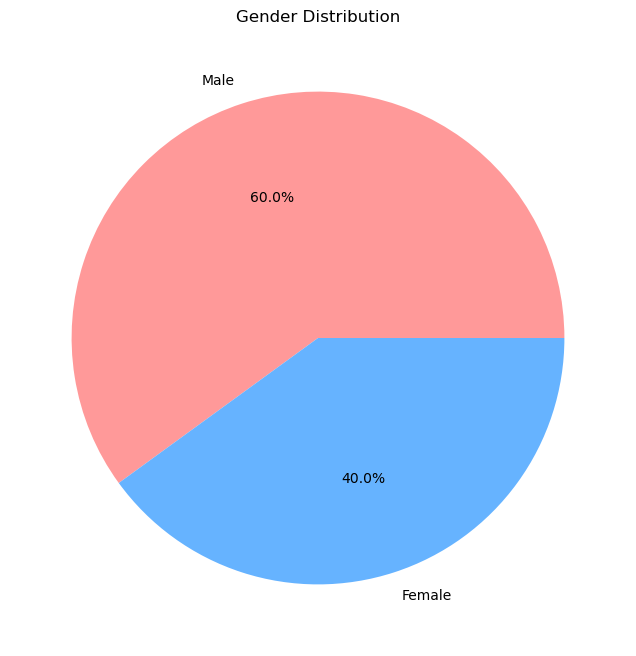

In [28]:
# 3. Gender Distribution Pie Chart
gender_counts = data_new['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

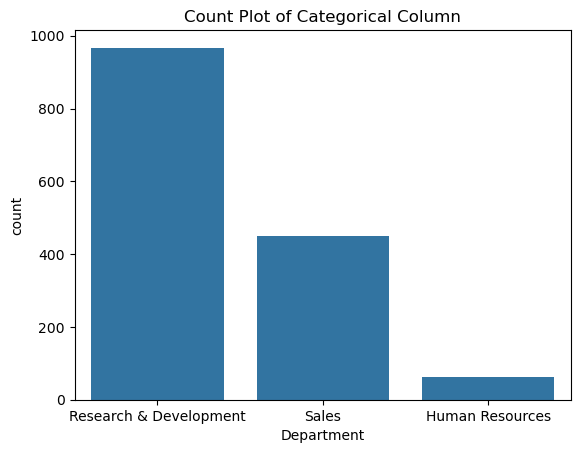

In [59]:
# Count plot
sns.countplot(x='Department', data=data)
plt.title('Count Plot of Categorical Column')
plt.show()

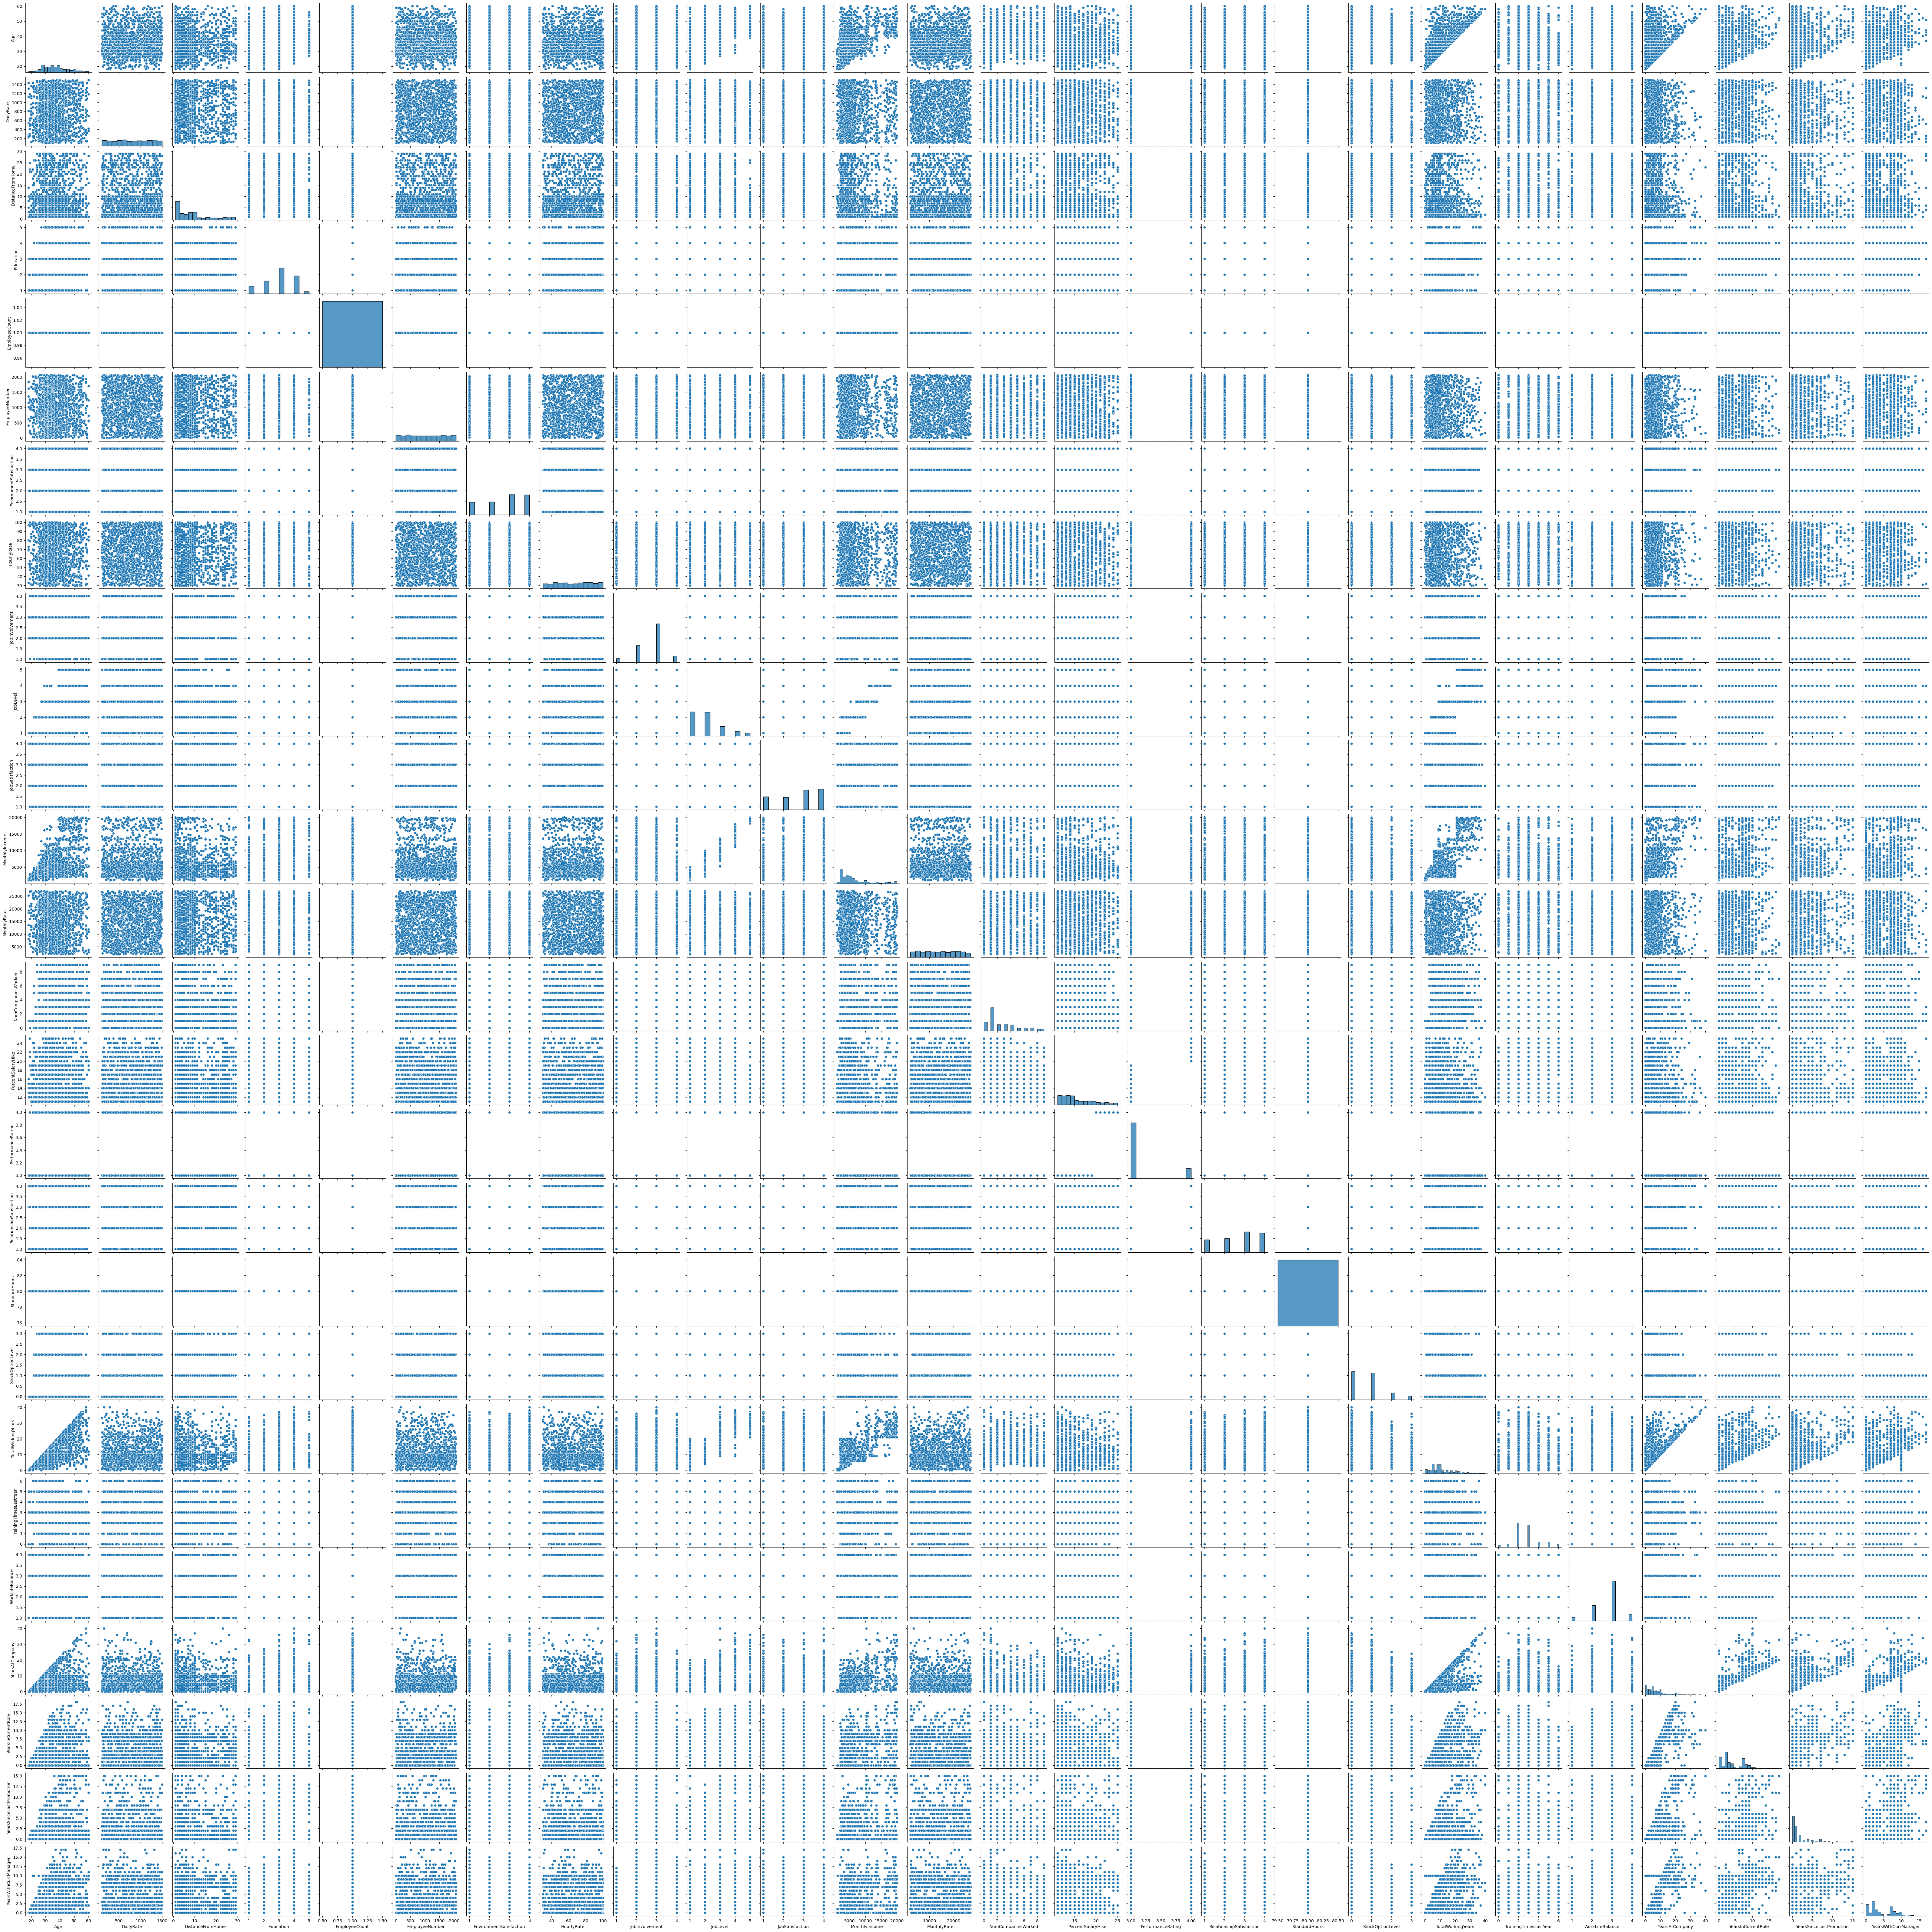

In [64]:
#Visualize relationships using a pairplot
sns.pairplot(data)
plt.show()

In [30]:
#  Clean non-numeric data in 'MonthlyIncome'
data_new['MonthlyIncome'] = data_new['MonthlyIncome'].replace('RM', '', regex=True).astype(float)

#  Convert all columns to numeric, coercing errors to NaN
data_new_numeric = data_new.apply(pd.to_numeric, errors='coerce')

#  Calculate the correlation matrix
correlation_matrix = data_new_numeric.corr()


C:\Users\cp756\AppData\Local\Temp\ipykernel_19656\1081312484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['MonthlyIncome'] = data_new['MonthlyIncome'].replace('RM', '', regex=True).astype(float)


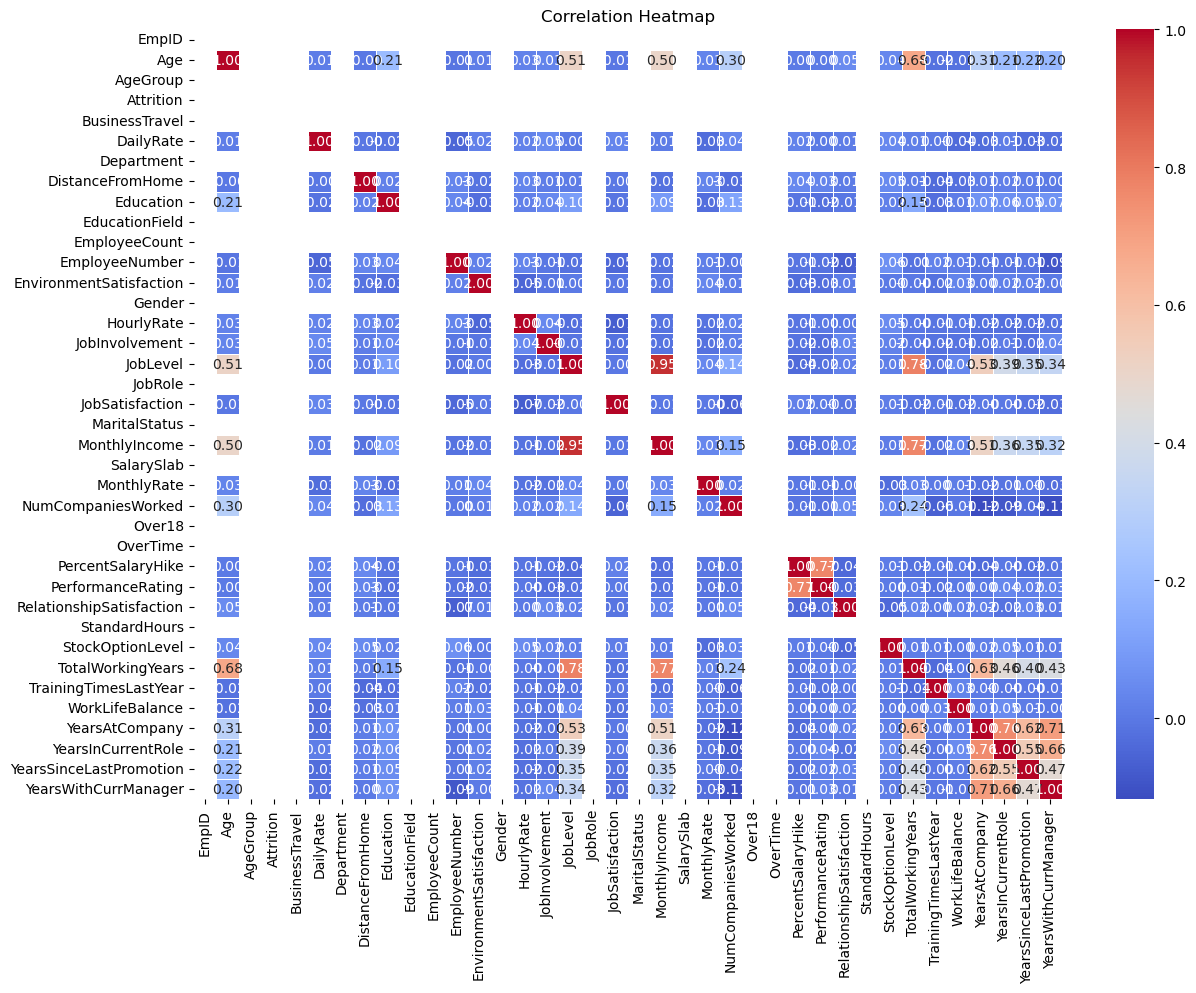

In [31]:
# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# Define target variable and features
X = data_new.drop('StandardHours', axis=1)
y = data_new['StockOptionLevel']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Predict on the test set
y_pred = model.predict(X_test)

In [43]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7352941176470589
Confusion Matrix:
 [[154  34   0   0]
 [  5 171   0   0]
 [  0  48   0   0]
 [  0  30   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       188
           1       0.60      0.97      0.75       176
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        30

    accuracy                           0.74       442
   macro avg       0.39      0.45      0.41       442
weighted avg       0.65      0.74      0.67       442



C:\Users\cp756\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cp756\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cp756\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
